Equipo 4
Estefania Puerta Dussan
Valentina Gomez
Alejandro Álvarez

Se importan las librerías necesarias para la reducción de dimensionalidad y para el cluster

In [1]:
import seaborn as sns
from sklearn import cluster
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
from clusteval import clusteval
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer

Se carga la base de datos "Credit card clients"

In [11]:
df = pd.read_csv(r"C:\Users\alejo\Documents\Analitica_2\Bases\credit_card_clients.csv")
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


Se eliminará la primer columna debido a que es un id y no tiene información relevante para el trabajo

In [12]:
df = df.drop("CUST_ID", axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

Se identifican ciertos valores nulos en el dataset, con el fin de no dejar dichos valores de esta forma, se decide reemplazar los valores nulos por la meida. Esto se presenta sólo en 2 columnas, donde una de ella sólo tiene un valor nulo.

In [18]:
df["MINIMUM_PAYMENTS"]=df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean())
df["CREDIT_LIMIT"]=df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean())

Se escalan las variables para que todas puedan tener el mismo perso para el modelo.

In [19]:
feat_sc=StandardScaler().fit_transform(df)

Se realizará reducción de dimensionalidad por el método PCA. El número de componentes inicial será 17 (el peor caso posible), y se irá afinando para definir cuál será el mejor número de componentes posibles.

In [119]:
pca=PCA(n_components=17)
pca.fit(feat_sc)

PCA(n_components=17)

In [120]:
pca.components_ ## lambdas, vectores propios pesos de observadas sobre latentes


array([[ 1.01077495e-01,  1.20043419e-01,  4.11641555e-01,
         3.46407027e-01,  3.36814315e-01, -2.33432386e-02,
         3.21492845e-01,  2.94633202e-01,  2.74709742e-01,
        -8.91390280e-02, -4.86539449e-02,  3.90695242e-01,
         2.11662921e-01,  2.66248975e-01,  6.03512816e-02,
         1.32112309e-01,  8.10205017e-02],
       [ 4.03957216e-01,  1.30537052e-01,  4.10378642e-02,
         6.28718737e-02, -1.85327951e-02,  4.39241530e-01,
        -1.90780251e-01, -1.79238154e-02, -1.78600911e-01,
         4.34082323e-01,  4.19733864e-01, -1.93940823e-02,
         2.38677935e-01,  2.57476073e-01,  1.66969516e-01,
        -1.90025512e-01, -4.32647646e-03],
       [-1.60075041e-01, -4.20629874e-01,  2.57902734e-01,
         3.92114887e-01, -1.10488391e-01, -2.73454003e-02,
        -3.74691466e-01,  1.15130725e-01, -4.73409191e-01,
        -1.09072169e-01, -1.15540504e-01, -7.73306395e-02,
         1.00483443e-01,  2.76236518e-01, -2.21634615e-01,
         1.24773556e-01, -6.4

In [21]:
ve=pca.explained_variance_ratio_  ### procentaje de variable explicada por cada componente
ve

array([2.72900372e-01, 2.03019913e-01, 8.79197945e-02, 7.47997502e-02,
       6.26279204e-02, 5.75021129e-02, 4.88723464e-02, 4.25748554e-02,
       3.82880445e-02, 3.08000623e-02, 2.37189739e-02, 1.77363237e-02,
       1.42649185e-02, 1.21736915e-02, 1.01298988e-02, 2.67033632e-03,
       6.85223491e-07])

In [126]:
componentes_principales = pca.components_
componentes_principales[0]


array([ 0.1010775 ,  0.12004342,  0.41164155,  0.34640703,  0.33681432,
       -0.02334324,  0.32149284,  0.2946332 ,  0.27470974, -0.08913903,
       -0.04865394,  0.39069524,  0.21166292,  0.26624897,  0.06035128,
        0.13211231,  0.0810205 ])

In [127]:
componentes_principales[1]

array([ 0.40395722,  0.13053705,  0.04103786,  0.06287187, -0.0185328 ,
        0.43924153, -0.19078025, -0.01792382, -0.17860091,  0.43408232,
        0.41973386, -0.01939408,  0.23867794,  0.25747607,  0.16696952,
       -0.19002551, -0.00432648])

**RESPUESTA PREGUNTA 1**

Según el porcentaje de varianza explicada, las variables latentes más importantes son la 1 y la 2, dentro de éstas las variables observadas más importantes serían para la variable latente 1 "PURCHASES", con un peso de 0.41164155. Por otro lado, para la variable latente 2, "CASH-ADVANCE" sería la variable observada más importante, con un peso de 0.43924153.

Se sacan las variables latentes

In [23]:
l = pca.transform(feat_sc) ## variables latentes

Se realiza la técnica del codo para identificar cuál es el mejor número de dimensiones para el modelo

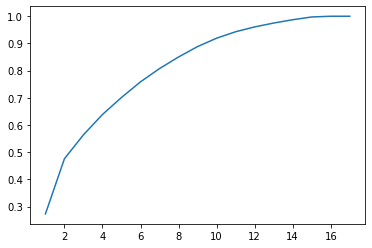

In [24]:
sns.lineplot(x=np.arange(1,18), y=np.cumsum(ve), palette="viridis")

**RESPUESTA 2**

Teniendo en cuenta la técnica del codo, y asumiendo que se eligieron 2 componentes (variables latentes) para el trabajo, el porcentaje de varianza que se va a explicar es de apróximadamente un 0.5, es decir un 50%. 
En este caso, se eligieron 2 componentes debido a que para aumentar el porcentaje de varianza explicada de forma significativa, se tendrían que aumentar mucho el número de componentes, y teniendo en cuenta el costo computacional y la complejidad que podría tomar el modelo con un número de componentes altos, se considera que no vale la pena.

In [54]:
l_sel=l[:,0:2]
l_sel

array([[-1.68222026, -1.07645061],
       [-1.1382949 ,  2.50647666],
       [ 0.96968401, -0.3835203 ],
       ...,
       [-0.92620364, -1.8107856 ],
       [-2.33655167, -0.65796601],
       [-0.55642216, -0.40046712]])

In [57]:
pca=PCA(n_components=2)
pca.fit(l_sel)

PCA(n_components=2)

In [59]:
pca.components_

array([[1., 0.],
       [0., 1.]])

In [60]:
pca.explained_variance_

array([4.63982474, 3.45172419])

Así es como se vería la distribución de nuestros nuevos datos graficada

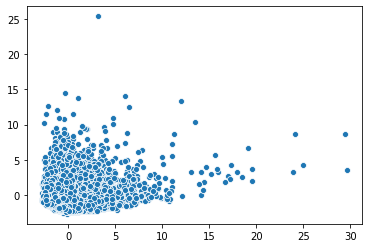

In [34]:
g1 =sns.scatterplot(x=l_sel[:,0], y=l_sel[:,1])
g1

Teniendo en cuenta como los datos están distribuidos, se procede a realizar una segmentación de los clientes a través del algoritmo de K-Means, ya que se considera que sería el más apropiado para este caso.

Se realiza un nuevo dataframe con los 2 componentes sacados recientemente

In [38]:
Data = pd.DataFrame(l_sel)
Data

,0,1
0,-1.682220,-1.076451
1,-1.138295,2.506477
2,0.969684,-0.383520
3,-0.873628,0.043166
4,-1.599434,-0.688581
...,...,...
8945,-0.359629,-2.016145
8946,-0.564369,-1.639123
8947,-0.926204,-1.810786
8948,-2.336552,-0.657966


Inicialmente, se realizará el modelo con un número de 3 clusters, y luego de esto se realizzará un ajuste de hiperparametros para identificar cuál sería la mejor opción

In [39]:
k= 3

In [40]:
kmedias = cluster.KMeans(n_clusters=k) 

In [42]:
kmedias.fit(Data) ##Se ajusta el modelo de Kmeans a los datos

KMeans(n_clusters=3)

Se le asigna una etiqueta a cada una de las observaciones de nuestro dataframe

In [43]:
cluster_label = kmedias.labels_

In [48]:
Data["cluster"] = cluster_label
Data

,0,1,cluster
0,-1.682220,-1.076451,2
1,-1.138295,2.506477,0
2,0.969684,-0.383520,2
3,-0.873628,0.043166,2
4,-1.599434,-0.688581,2
...,...,...,...
8945,-0.359629,-2.016145,2
8946,-0.564369,-1.639123,2
8947,-0.926204,-1.810786,2
8948,-2.336552,-0.657966,2


Se sacan las coordenadas de los centroides para poder graficar y ver cómo se vería nuestro modelo

In [46]:
centroides = kmedias.cluster_centers_

In [47]:
centroides

array([[-0.81244355,  2.9164185 ],
       [ 3.97280145, -0.11039721],
       [-0.55996007, -0.76080171]])

Se saca la gráfica del modelo

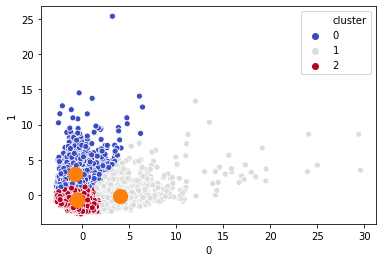

In [49]:
sns.scatterplot(x=0, y =1, data = Data, hue ="cluster", palette= "coolwarm")
plt.scatter(x= centroides[:,0], y = centroides[:,1], marker = "o", s=200)
plt.show()

Como se puede ver en la gráfica a pesar de los datos atípicos, y a pesar de que todos los datos están realmente muy poco dispersos (reunidos en un punto), la clusterización se puede ver efectiva, teniendo presente que está agrupando los datos en 3 categorías de una forma relativamente coherente.

In [52]:
X_s = Data[[0, 1]] 

In [53]:
WCSS= []
sil = []

In [62]:
for k in range(2,15):
    km = cluster.KMeans(n_clusters=k, n_init=10)
    km = km.fit(X_s)
    WCSS.append(km.inertia_)
    label = km.labels_
    if k>1:
        sil_avg = silhouette_score(X_s,label)
        sil.append(sil_avg)

In [63]:
WCSS

[49658.64107950833,
 33017.49824645222,
 24524.29957421126,
 19453.720447475494,
 16215.998462353688,
 13801.197179222823,
 12308.055649839269,
 10911.508150442021,
 9883.83605025634,
 8961.456923770394,
 8116.122634996976,
 7592.785644143641,
 7089.322770676826]

In [64]:
len(WCSS)

13

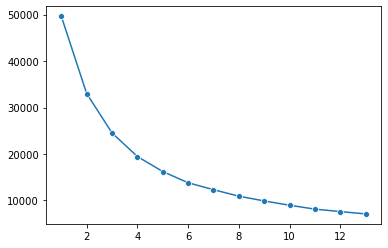

In [65]:
sns.lineplot(x=np.arange(1,14), y= WCSS, marker="o", palette="coolwarm")
plt.show()

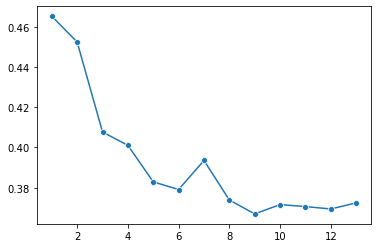

In [66]:
sns.lineplot(x=np.arange(1,14), y= sil, marker="o", palette="coolwarm")
plt.show()

In [67]:
kl = KneeLocator(x=np.arange(1,14), y= WCSS, curve="convex", direction="decreasing")

In [68]:
kl.elbow

4

In [111]:
kmedias2 = cluster.KMeans(n_clusters=4)

In [112]:
kmedias2.fit(X_s)

KMeans(n_clusters=4)

In [113]:
cluster_label2 = kmedias2.labels_

In [114]:
Data["cluster"] = cluster_label2

In [128]:
df["cluster"] = cluster_label2

In [115]:
Data

,0,1,cluster
0,-1.682220,-1.076451,1
1,-1.138295,2.506477,0
2,0.969684,-0.383520,2
3,-0.873628,0.043166,1
4,-1.599434,-0.688581,1
...,...,...,...
8945,-0.359629,-2.016145,2
8946,-0.564369,-1.639123,2
8947,-0.926204,-1.810786,1
8948,-2.336552,-0.657966,1


In [116]:
centroides2 = kmedias2.cluster_centers_

In [117]:
centroides2

array([[-0.53629451,  3.4199967 ],
       [-1.36268326, -0.1974753 ],
       [ 0.91494507, -1.16688652],
       [ 6.0065483 ,  0.69126502]])

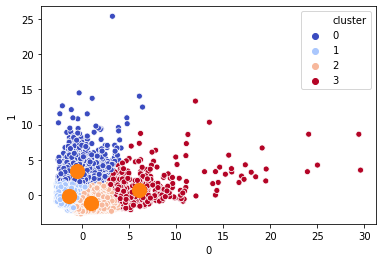

In [118]:
sns.scatterplot(x=0, y =1, data = Data, hue ="cluster", palette= "coolwarm")
plt.scatter(x= centroides2[:,0], y = centroides2[:,1], marker = "o", s=200)
plt.show()

**RESPUESTA 3**

Las principales diferencias serían que el cluster 1 y 2 son en tamaño, mucho más pequeños que el cluster 0 y 3. Esto se puede deber a que los datos están más juntos en el 1 y 2, además los cluster 0 y 3 se pueden ver afectados por la cantidad de datos atípicos que se encuentran en el dataframe.
Otra diferencia es la posición de los centroides, teniendo en cuenta los datos atípicos y la aglomeración de los datos, se puede apreciar como realmente los centroides no se ubican en el centro del cluster, sino en una posición estratégica para poder segmentar los datos de una forma coherente.

In [138]:
cero = df[df["cluster"] ==0]
Uno = df[df["cluster"] ==1]
Dos = df[df["cluster"] ==2]
Tres = df[df["cluster"] ==3]



In [140]:
cero.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
count,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.0
mean,4510.612798,0.963486,462.647357,300.127390,162.619301,4401.478579,0.266258,0.129829,0.166187,0.470904,13.771084,6.703614,7458.798832,3542.319312,2059.693604,0.034947,11.439357,0.0
std,2723.982121,0.107602,801.070727,618.223133,393.696010,3589.270500,0.344001,0.218409,0.297207,0.231374,12.209906,12.016924,3701.982476,4371.342204,4026.886727,0.104338,1.397825,0.0
min,4.382924,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,16.950090,0.000000,6.000000,0.0
25%,2437.750644,1.000000,0.000000,0.000000,0.000000,2236.145259,0.000000,0.000000,0.000000,0.300000,7.000000,0.000000,5000.000000,1194.040750,753.530747,0.000000,12.000000,0.0
50%,4175.826879,1.000000,61.990000,0.000000,0.000000,3553.203852,0.083333,0.000000,0.000000,0.416667,11.000000,1.000000,7000.000000,1962.972636,1296.586971,0.000000,12.000000,0.0
75%,6045.192228,1.000000,598.500000,307.800000,114.000000,5465.141893,0.500000,0.166667,0.250000,0.636364,17.000000,9.000000,9500.000000,4114.602852,2012.365718,0.000000,12.000000,0.0
max,16304.889250,1.000000,5197.220000,4139.560000,4059.930000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,91.000000,21500.000000,39048.597620,61031.618600,1.000000,12.000000,0.0


In [142]:
Tres.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
count,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.0
mean,3407.930310,0.988404,6901.170916,4516.913486,2385.452649,774.694615,0.954352,0.726123,0.808566,0.084975,2.368526,82.980080,9548.705179,6730.862051,1834.510601,0.286595,11.960159,3.0
std,3243.569668,0.055035,5650.878331,5025.284702,2525.965622,1971.849519,0.122269,0.293037,0.293432,0.164585,6.239854,53.573458,4696.047019,6423.449833,4730.508626,0.392343,0.407522,0.0
min,21.311946,0.272727,900.870000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,3.000000,1000.000000,0.000000,53.628070,0.000000,6.000000,3.0
25%,819.078818,1.000000,4020.217500,1937.545000,840.787500,0.000000,1.000000,0.583333,0.750000,0.000000,0.000000,48.250000,6000.000000,3366.276695,237.210920,0.000000,12.000000,3.0
50%,2424.074005,1.000000,5265.415000,3162.200000,1690.050000,0.000000,1.000000,0.833333,1.000000,0.000000,0.000000,71.000000,9000.000000,4830.216631,705.335747,0.000000,12.000000,3.0
75%,5056.493876,1.000000,7673.762500,5256.555000,2973.847500,470.286557,1.000000,1.000000,1.000000,0.083333,2.000000,102.750000,12000.000000,7932.688199,1799.116472,0.666667,12.000000,3.0
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,19513.474830,1.000000,1.000000,1.000000,1.000000,62.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,3.0


**Respuesta 4**

Desde el PCA sabemos que las variables más importantes son los avances que se hacen en efectivo y las compras realizadas con la tarjeta, por lo que podemos dirigir estrategias a ese tipo de transacciones para aumentar la fidelización y también la motivación de uso de la tarjeta.

Inicialmente se puede proponer que a partir de cierto dinero superado en compras o a partir de cierto número de transacciones realizadas con la tarjeta, la cuota de manejo que se paga por dicha tarjeta se puede eliminar. Otro aspecto a proponer sería la reducción de tasa de intereses teniendo en cuenta las mismas variables.